In [7]:
# Procesamiento de datos
import pandas as pd
# Funciones algebráicas
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
## Estilos
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
# Contador
from collections import Counter
# Métodos de iteración
from itertools import product
# Machine Learning
## Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
## Separación de datos de entrenamiento
from sklearn.model_selection import train_test_split
## Preprocesamiento de variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, RobustScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer
# Modelos de clasificacion
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

## Modelo de máquina de soporte vectorial
from sklearn.svm import SVC
## Clasificador de árbol de decisión
from sklearn.tree import DecisionTreeClassifier
## Clasificador de bosques aleatorios
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
## Regresión Logística
from sklearn.linear_model import LogisticRegression
## Muestreado para balancear datos
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
## Métricas
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay, f1_score, make_scorer, precision_score, recall_score, log_loss
## Ajuste de hiperparámetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# módulo que proporciona soporte en tiempo de ejecución para sugerencias de tipo
from sklearn import datasets
from typing import Dict, Iterable, Any
# Desactivar los avisos
import warnings
warnings.filterwarnings('ignore')
# Importar los datos de yahoo
import yfinance as yf
# Librería para plotear mejor datos financieros
#import cufflinks as cf
#cf.set_config_file(offline = True)

He intentado escoger acciones con poca correlación. La explicación de ellas es:

AAPL: Apple Inc., uno de los fabricantes más grandes de tecnología de consumo, conocido por productos como el iPhone, el iPad y las MacBooks.

RELIANCE.NS: Reliance Industries Limited, una conglomerado multinacional indio que tiene negocios en diversos sectores como energía, petroquímicos, textiles, recursos naturales, y telecomunicaciones. El sufijo ".NS" indica que la acción se negocia en la National Stock Exchange of India.

BHP.AX: BHP Group Limited (anteriormente BHP Billiton), una de las compañías mineras y de recursos más grandes del mundo. El sufijo ".AX" indica que la acción se negocia en la Australian Securities Exchange.

SAN.MC: Banco Santander, S.A., un banco multinacional español y una de las mayores instituciones bancarias de la zona euro. El sufijo ".MC" indica que la acción se negocia en la Bolsa de Madrid.

REP.MC: Repsol, S.A., una empresa energética y petroquímica española. Al igual que SAN.MC, el sufijo ".MC" indica que la acción se negocia en la Bolsa de Madrid.

IBE.MC: Iberdrola, S.A., una empresa española de energía, una de las mayores productoras de energía renovable. También cotiza en la Bolsa de Madrid.

TEF.MC: Telefónica, S.A., una compañía multinacional de telecomunicaciones con sede en España. También cotiza en la Bolsa de Madrid.

Acciones con las que trabajaré: 

["AAPL", "RELIANCE.NS", "BHP.AX", "SAN.MC", "REP.MC", "IBE.MC", "TEF.MC"]

In [8]:
df = pd.read_csv("acciones_preprocesado.csv")
# quito los que devuelve 0 la dirección ya que no me calcula bien las métricas de los modelos
df = df[df.direction != 0]
df.reset_index(inplace=True, drop=True)

df

,accion,date,price,returns,price_lag1,high_lag1,low_lag1,direction,lag1,lag2,...,roll_high,year,day_of_year,week_of_year,sin_month,cos_month,sin_day,cos_day,sin_day_of_week,cos_day_of_week
0,AAPL,2010-10-26,9.314106,-0.002561,9.337993,11.128571,11.015714,-1.0,0.004446,-0.006645,...,11.392857,2010,299,43,-8.660254e-01,0.500000,-0.848644,0.528964,0.781831,0.623490
1,AAPL,2010-10-27,9.307454,-0.000714,9.314106,11.062143,10.916071,-1.0,-0.002561,0.004446,...,11.392857,2010,300,43,-8.660254e-01,0.500000,-0.724793,0.688967,0.974928,-0.222521
2,AAPL,2010-10-28,9.229144,-0.008449,9.307454,11.067857,10.914286,-1.0,-0.000714,-0.002561,...,11.392857,2010,301,43,-8.660254e-01,0.500000,-0.571268,0.820763,0.433884,-0.900969
3,AAPL,2010-10-29,9.100337,-0.014055,9.229144,11.000000,10.746429,-1.0,-0.008449,-0.000714,...,11.392857,2010,302,43,-8.660254e-01,0.500000,-0.394356,0.918958,-0.433884,-0.900969
4,AAPL,2010-11-01,9.197091,0.010576,9.100337,10.924286,10.745357,1.0,-0.014055,-0.008449,...,11.392857,2010,305,44,-5.000000e-01,0.866025,0.201299,0.979530,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16674,TEF.MC,2023-12-21,3.492111,-0.015339,3.546088,3.820000,3.646000,-1.0,0.031477,-0.007545,...,4.075000,2023,355,51,-2.449294e-16,1.000000,-0.897805,-0.440394,0.433884,-0.900969
16675,TEF.MC,2023-12-22,3.454520,-0.010823,3.492111,3.685000,3.615000,-1.0,-0.015339,0.031477,...,4.075000,2023,356,51,-2.449294e-16,1.000000,-0.968077,-0.250653,-0.433884,-0.900969
16676,TEF.MC,2023-12-27,3.441990,-0.003634,3.454520,3.650000,3.571000,-1.0,-0.010823,-0.015339,...,4.075000,2023,361,52,-2.449294e-16,1.000000,-0.724793,0.688967,0.974928,-0.222521
16677,TEF.MC,2023-12-28,3.412110,-0.008719,3.441990,3.590000,3.555000,-1.0,-0.003634,-0.010823,...,4.075000,2023,362,52,-2.449294e-16,1.000000,-0.571268,0.820763,0.433884,-0.900969


In [14]:
df.groupby('accion')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
accion,,,,,,,,
AAPL,3311.0,60.922192,56.002940,9.085828,18.717533,34.182632,112.596035,197.857529
IBE.MC,3333.0,5.736015,2.858960,1.571049,3.285627,4.765172,8.817133,11.670105
REP.MC,3339.0,9.504391,2.092162,4.308902,8.181144,9.595407,10.666315,15.265988
SAN.MC,3359.0,3.291509,0.757050,1.300221,2.801852,3.233801,3.808489,5.014844
TEF.MC,3337.0,4.850682,1.308233,2.011848,3.622041,4.933969,5.808998,7.799139


In [9]:
scalers = {
    "MinMax Scaler": MinMaxScaler(),
    "Standard Scaler": StandardScaler(),
    "MaxAbs Scaler": MaxAbsScaler(),
    "Robust Scaler": RobustScaler(),
    "Quant-Normal": QuantileTransformer(output_distribution="normal"),
    "Quant-Uniform": QuantileTransformer(output_distribution="uniform"),
    "PowerTransf-YeoJohnson": PowerTransformer(method='yeo-johnson')
}

In [10]:
df_scaler = df[["price_lag1"]]
df_scaler

,price_lag1
0,9.337993
1,9.314106
2,9.307454
3,9.229144
4,9.100337
...,...
16674,3.546088
16675,3.492111
16676,3.454520
16677,3.441990


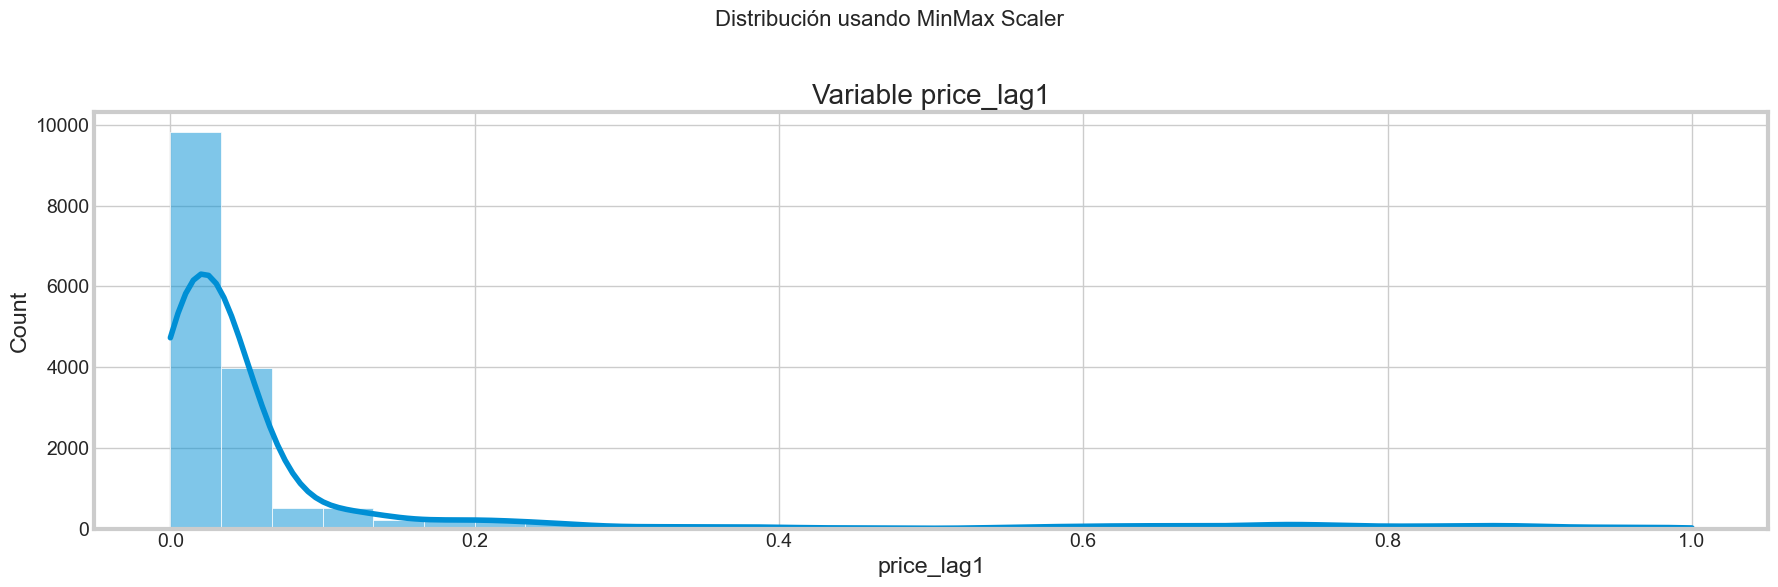

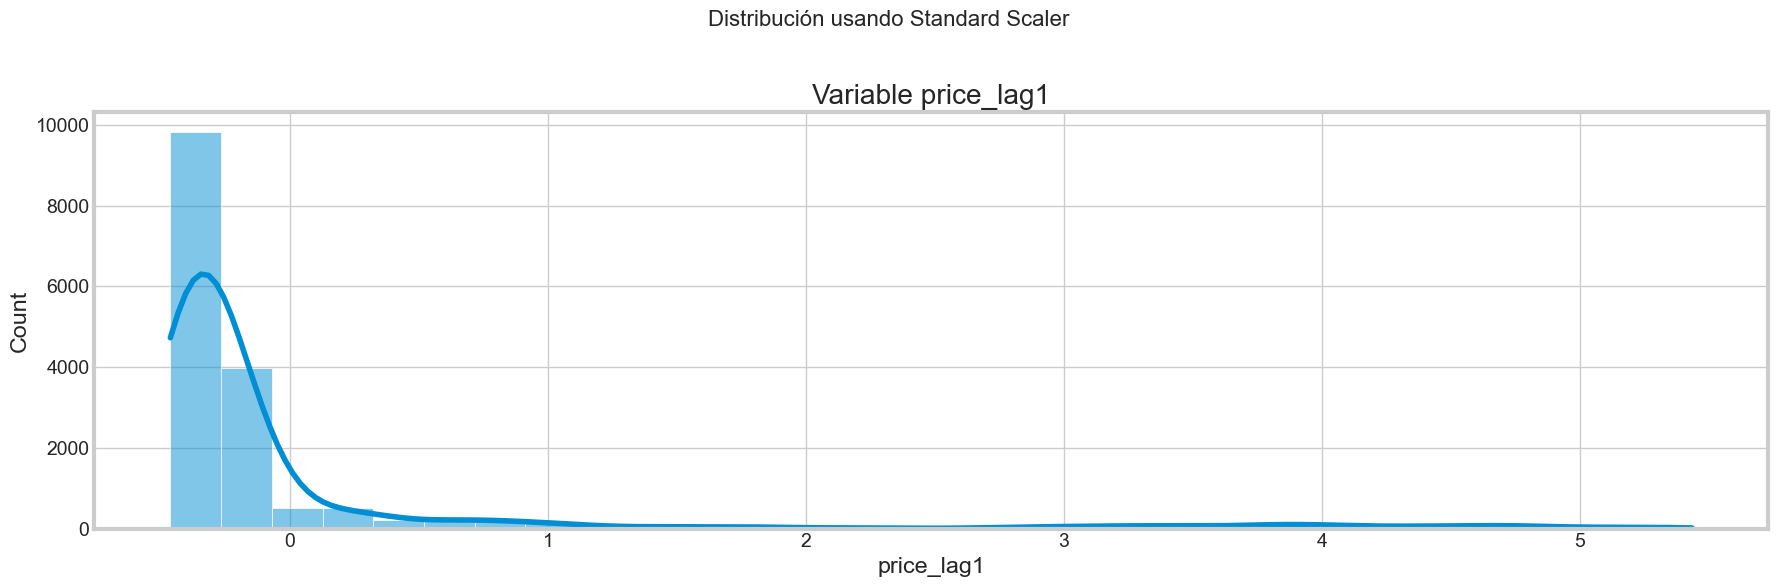

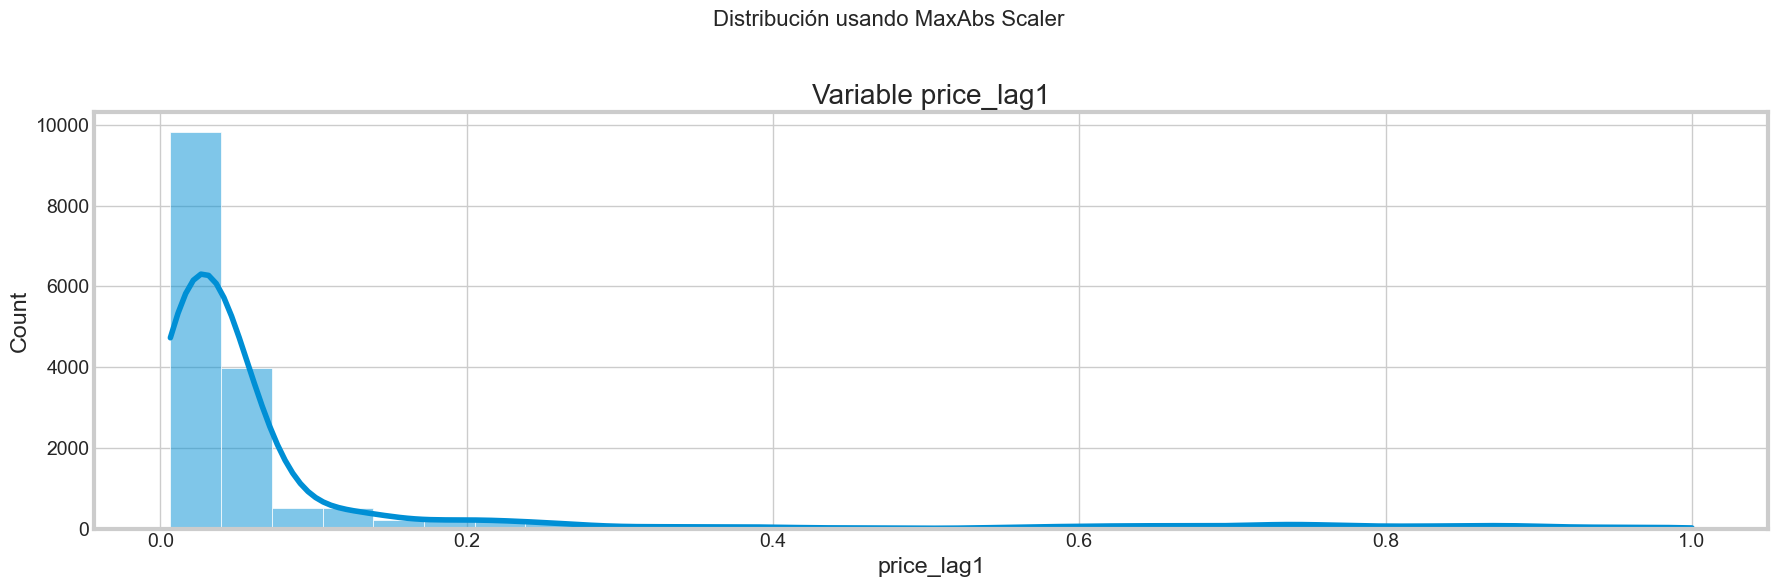

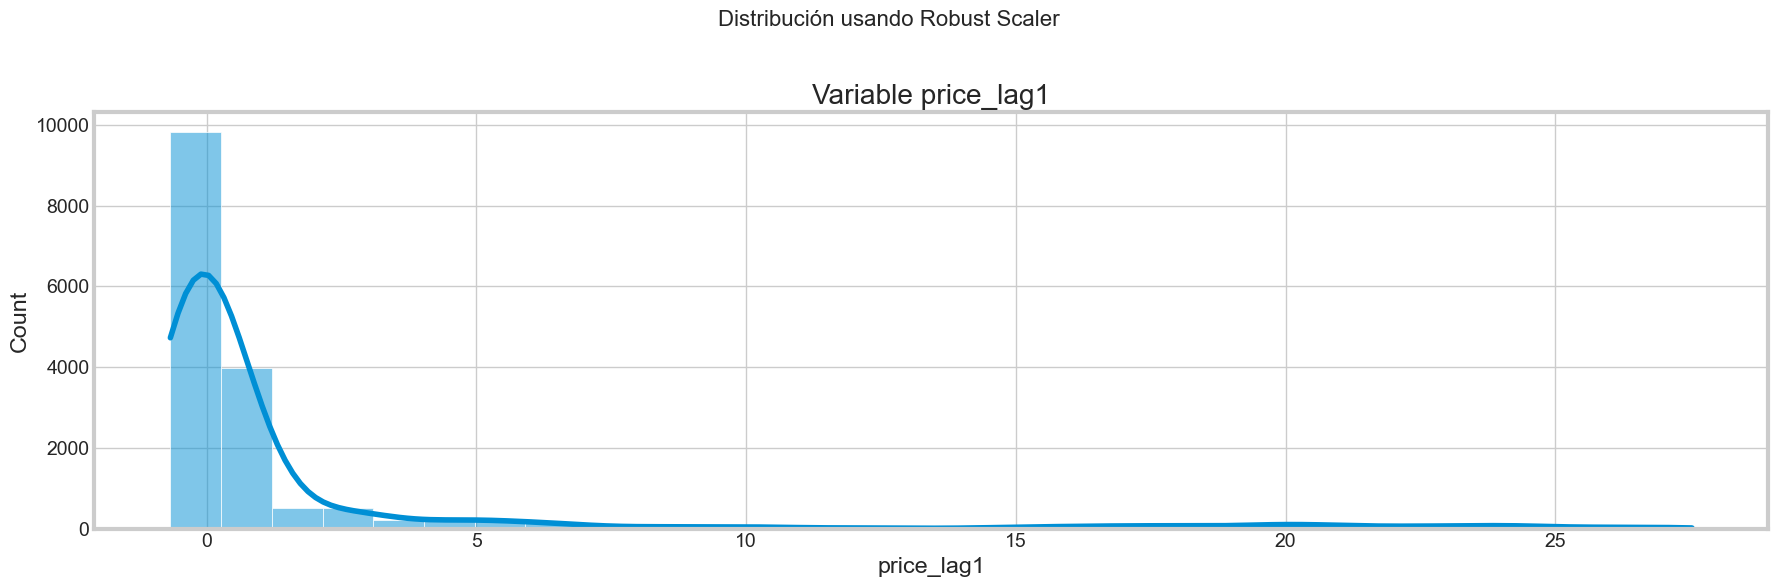

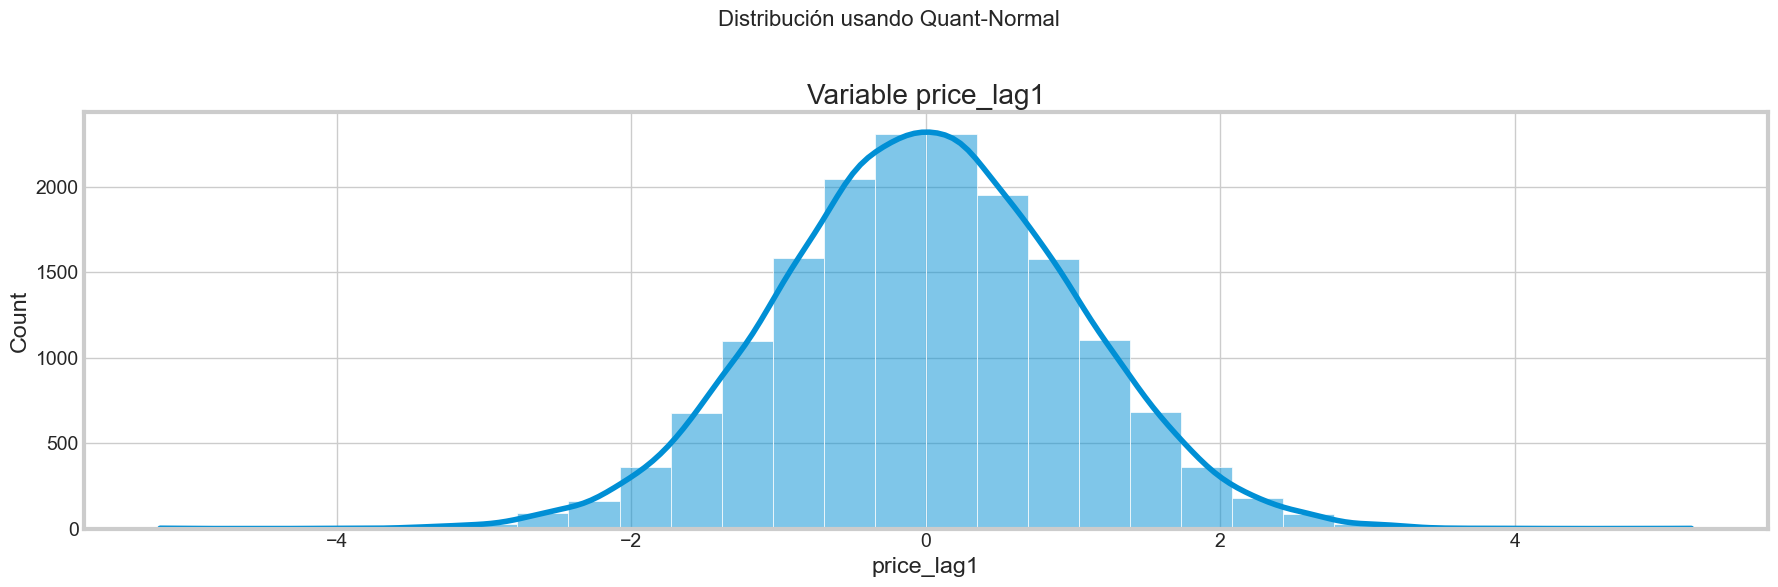

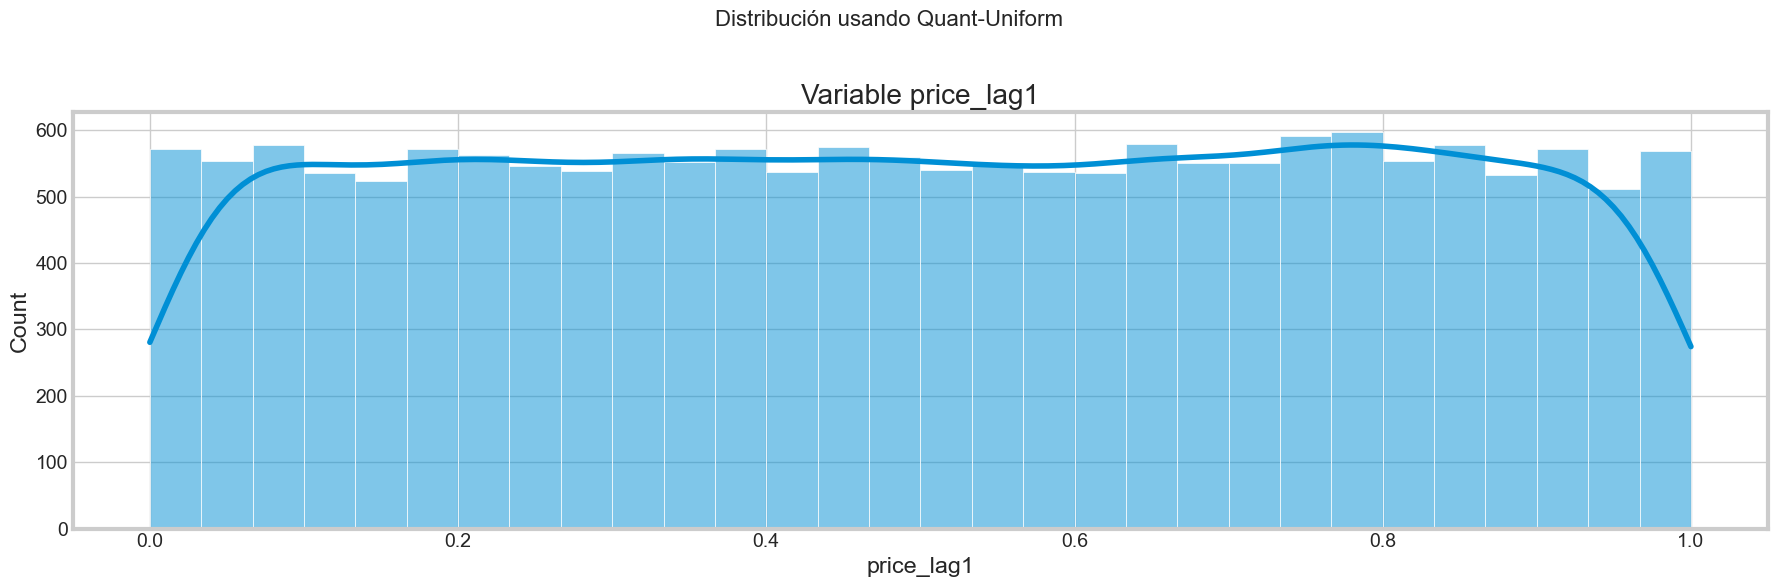

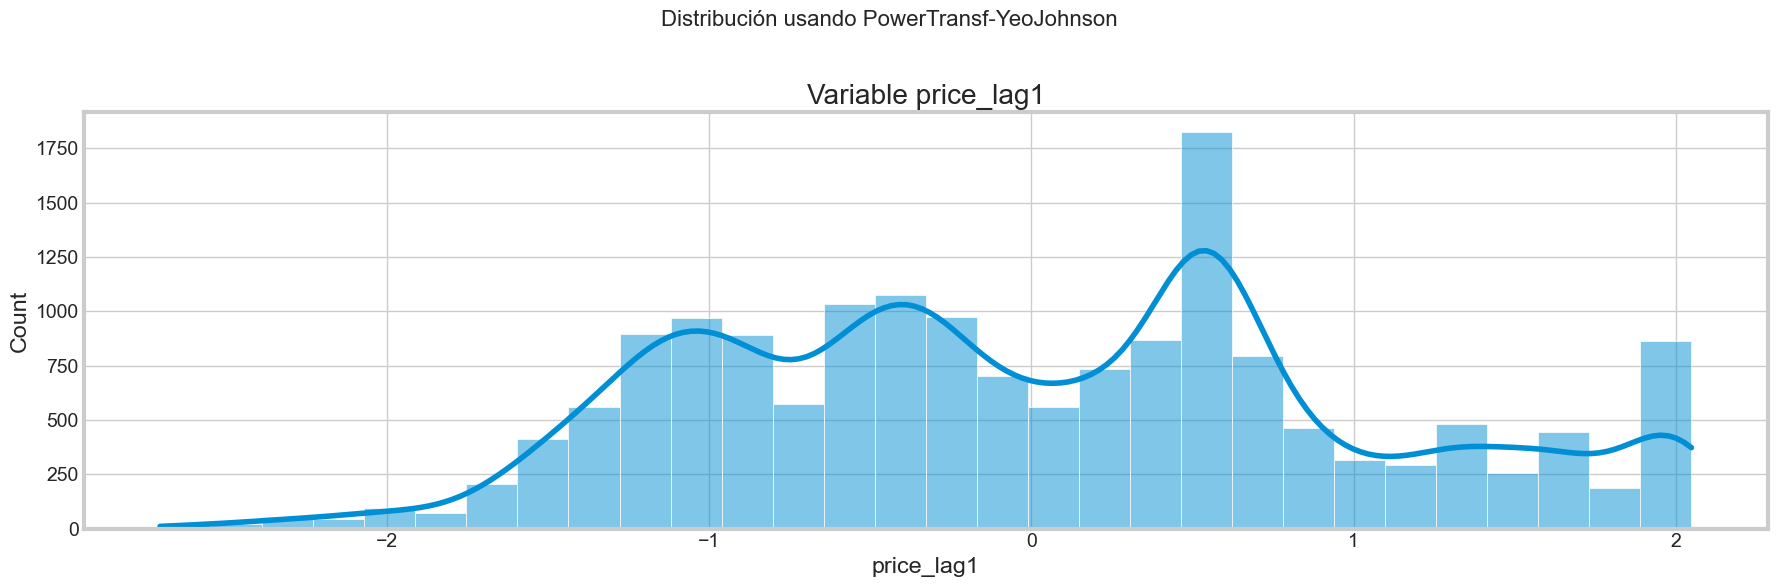

In [12]:
for name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(df_scaler)
    scaled_df = pd.DataFrame(scaled_data, columns=df_scaler.columns)
    
    plt.figure(figsize=(18, 6))
    plt.suptitle(f'Distribución usando {name}', fontsize=16, ha='center')
    
    plt.subplot(1, 1, 1)
    column = scaled_df.columns[0]  # Suponiendo que solo hay una columna
    sns.histplot(scaled_df[column], kde=True, bins=30)
    plt.xlabel(column)
    plt.title(f'Variable {column}')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


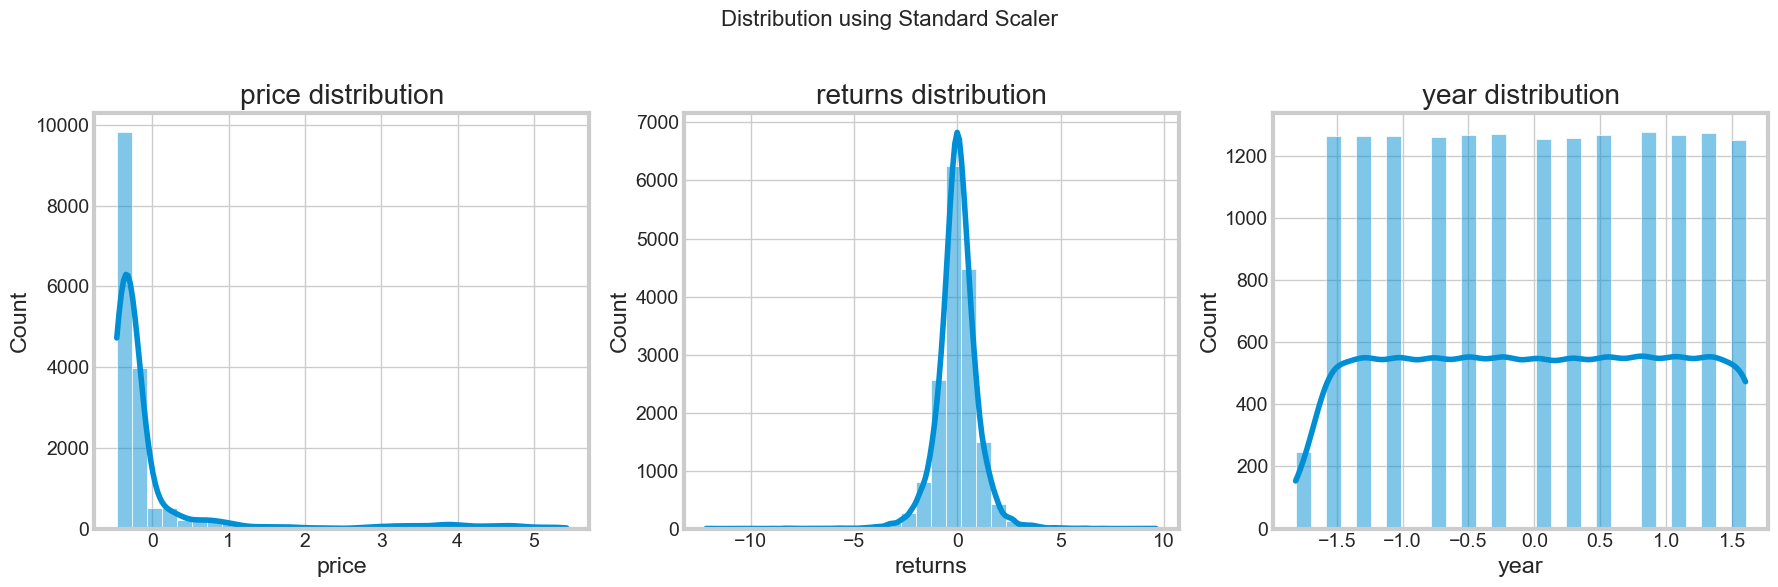

In [22]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_scaler)
scaled_df = pd.DataFrame(scaled_data, columns=df_scaler.columns)

# Visualizar la distribución de las variables escaladas
plt.figure(figsize=(18, 6))
plt.suptitle('Distribution using Standard Scaler', fontsize=16)

for i, column in enumerate(scaled_df.columns):
    if column == "lag1":
        columna = "returns"
    else: columna = column
    plt.subplot(1, 3, i + 1)
    sns.histplot(scaled_df[column], kde=True, bins=30)
    plt.xlabel(columna)
    plt.title(f'{columna} distribution')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [23]:
# distribución sin escalar

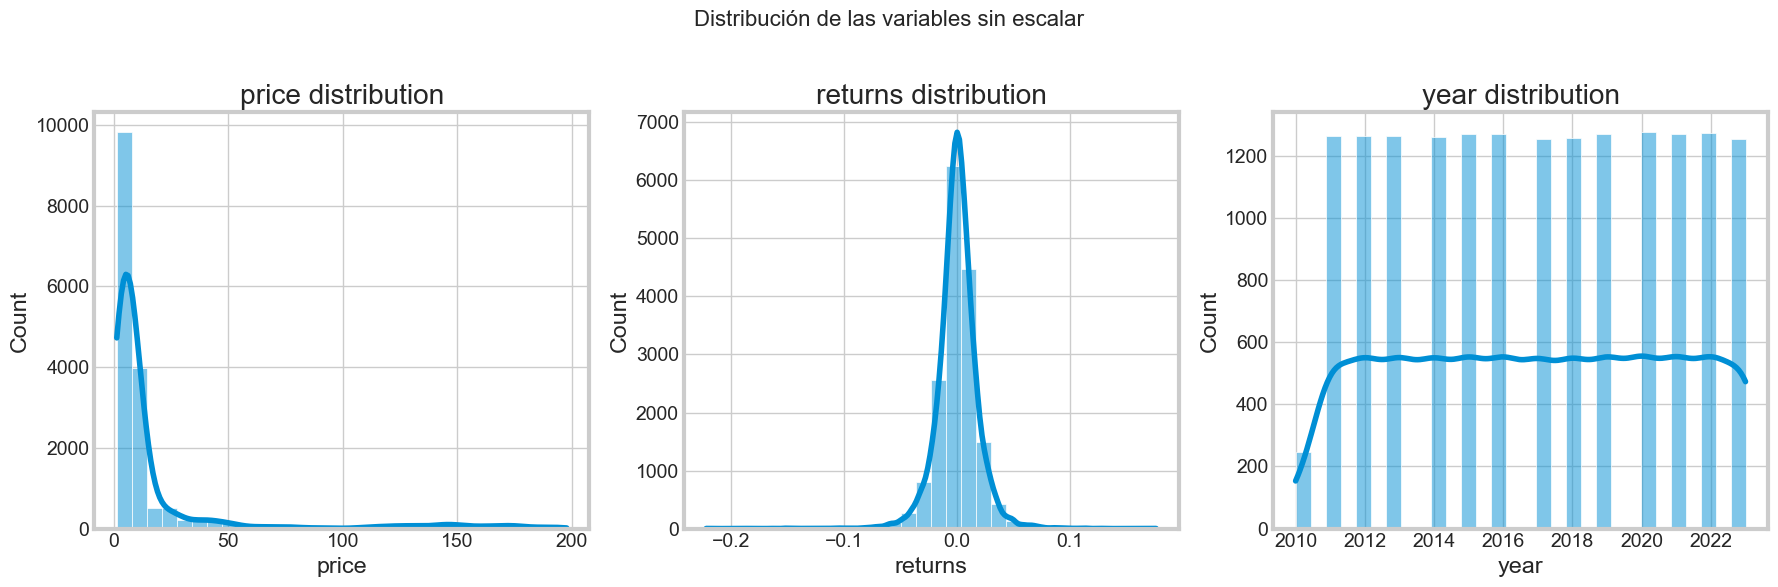

In [27]:
plt.figure(figsize=(18, 6))
plt.suptitle('Distribución de las variables sin escalar', fontsize=16)

for i, column in enumerate(df_scaler.columns):
    if column == "lag1":
        columna = "returns"
    else:
        columna = column
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_scaler[column], kde=True, bins=30)
    plt.xlabel(columna)
    plt.title(f'{columna} distribution')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()